# Plot the schematic of the 4m biaxial apparatus

In this notebook, we plot the shape of the 4m biaxial machine and the geometry of the gouge patches with the AE sensor Array.

Modified from `plot_4mframeandSensors.ipynb`.

2025.1.9 Kurama Okubo

In [1]:
import os
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from glob import glob
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from tqdm import tqdm
import warnings

from matplotlib.patches import Rectangle, Circle, Ellipse
import matplotlib.cm as cm
import seaborn as sns

plt.rcParams["font.family"] = 'Arial'
# plt.rcParams["font.sans-serif"] = "DejaVu Sans, Arial, Helvetica, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["xtick.minor.size"] = 2
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.visible"] = True


plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["ytick.minor.size"] = 2
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.minor.visible"] = True

In [2]:
figdir = "../figure"
if not os.path.exists(figdir):
    os.makedirs(figdir)

In [3]:
channel_finame = '../../../../Others/AEchanneltable/AEsensorlocation_onFB03_table.csv'

In [4]:
df_array = pd.read_csv(channel_finame)

channel_loc={}

for i in range(len(df_array)):
    stnm = df_array.iloc[i].Instrument_Label
    xtemp = df_array.iloc[i].North.astype('float')
    ytemp = df_array.iloc[i].East.astype('float')
    ztemp = df_array.iloc[i].Down.astype('float')
    channel_loc[stnm] = [xtemp, ytemp, ztemp]
    
Nsensor = len(channel_loc)
# channel_loc

# 1. Plot side view of the rock specimen

In [5]:
AEsensor_color = "crimson"
Rock_color =  [0.9, 0.9, 0.9]

In [6]:
lc = sns.color_palette("tab10")
lc

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [7]:
lc
Gapsensorcolor=lc[-2]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


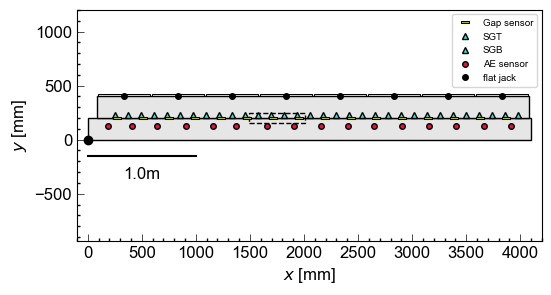

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

# bottom sample
left = 0 #[mm]
bottom = 0 #[mm]
width = 4100 #[mm]
height = 200 #[mm]
fontsize=12

rect_bot = Rectangle((left, bottom), width, height, fill=True, fc=Rock_color, edgecolor="k")

# top sample
xtop_shift = 85 #[mm]
rect_top = Rectangle((left+xtop_shift, bottom+height), width-100, height, fill=True, fc=Rock_color, edgecolor="k")

ax.axis('equal')

ax.add_patch(rect_bot)
ax.add_patch(rect_top)
ax.autoscale()

# Plot origin of coordinate
ax.plot(0, 0, "ko", label=None)

# Plot displacement sensor
disp_x = 270+np.arange(0, 16)*240
disp_y = np.ones(len(disp_x))*200
# rectangle marker ref: https://stackoverflow.com/a/57923933
dispmw = 20
dispmh = 7
verts = list(zip([-dispmw,dispmw,dispmw,-dispmw, -dispmw],[-dispmh,-dispmh,dispmh,dispmh, -dispmh]))
ax.plot(disp_x, disp_y, marker=verts, ls="", c=Gapsensorcolor, label="Gap sensor", zorder=3, markeredgecolor="k", markeredgewidth=0.75)

# Plot Strain gouges (south side)
SGT_x = xtop_shift + 170 + np.arange(0, 16)*240
SGB_x = xtop_shift + 170 + 120 + np.arange(0, 16)*240
SG_y = np.ones(len(SGT_x))*210
SG_y_margin = 20 # to emphasize that the strain gauge is installed on the upper side
ax.plot(SGT_x, SG_y+SG_y_margin, "^", c="turquoise", mec="k", ms=5, label="SGT")
ax.plot(SGB_x, SG_y+SG_y_margin, "^", c="turquoise", mec="k", ms=5, label="SGB")

# Plot AE sensors
df_ARsensor_south = df_array[df_array["East"] > 0]
ax.plot(df_ARsensor_south["North"].values, height-df_ARsensor_south["Down"].values, "o", c=AEsensor_color, mec="k",
        ms=4, label="AE sensor")

# Plot flat jack
flatjack_x = xtop_shift + 250 + np.arange(0, 8)*500
flatjack_y = np.ones(len(flatjack_x))*400
ax.plot(flatjack_x, flatjack_y, "o", c="k", ms=4, label="flat jack")
ax.legend(loc=0, fontsize=7)

# Plot actual flat jack plates
flatjack_xlen = 480 #[mm]
flatjack_hight = 15 #[mm]
flatjack_hmargin = 5 #[mm]
xtop_shift = 85 #[mm]
flatjack_color=[0.8, 0.8, 0.8]
for fx in flatjack_x:
    flatjack_rec = Rectangle((fx-flatjack_xlen/2, bottom+2*height+flatjack_hmargin), flatjack_xlen, flatjack_hight,
                             fill=True, fc=flatjack_color, edgecolor="k", lw=0.75)
    ax.add_patch(flatjack_rec)


# Plot scale
scale_len = 1000
scale_x = 0 #4100-scale_len #(4100-scale_len)/2
ax.plot([scale_x, scale_x+scale_len], [-150, -150], "k-")
ax.text(scale_x+scale_len/2, -250, f"{scale_len/1e3}m", ha="center", va="top")

#---Annotate zoomed area---#
gougepatch_x = [750, 1250, 1750, 2250, 2750, 3250, 3750]
gougepatch_id =3 # G3
gx = gougepatch_x[gougepatch_id-1] 
xlim_len_left = 255
xlim_len_right = 255
xlimit_zoom = [gx-xlim_len_left, gx+xlim_len_right]
# ax.plot([xlimit_zoom[0], xlimit_zoom[1]], [height, height], "k", lw=3)
zoombox_H_side=100
rect_zoom_side = Rectangle((gx-xlim_len_left, height-zoombox_H_side/2), xlimit_zoom[1]-xlimit_zoom[0], zoombox_H_side,
                           fill=False,edgecolor="k", ls="--")
ax.add_patch(rect_zoom_side)

# Decorate figure
ax.set_xlim([-100, 4200])

# ax.set_ylim([-1000, 1000]) # axis set as equal
# ax.set_yticks([0, -25, -50, -75, -100])
ax.set_xlabel(r"$x$ [mm]", fontsize=fontsize)
ax.set_ylabel(r"$y$ [mm]", fontsize=fontsize)

# fig.tight_layout()
# ax.axis("off")

plt.savefig(figdir+"/4mrocksamples_schematic.png", format="png", bbox_inches="tight", dpi=80)
plt.savefig(figdir+"/4mrocksamples_schematic.eps", format="eps", bbox_inches="tight")



# Plot top view of the fault

In [9]:
lc = sns.color_palette("colorblind")
lc

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [10]:
gougepatch_color = "w" #lc[8] #

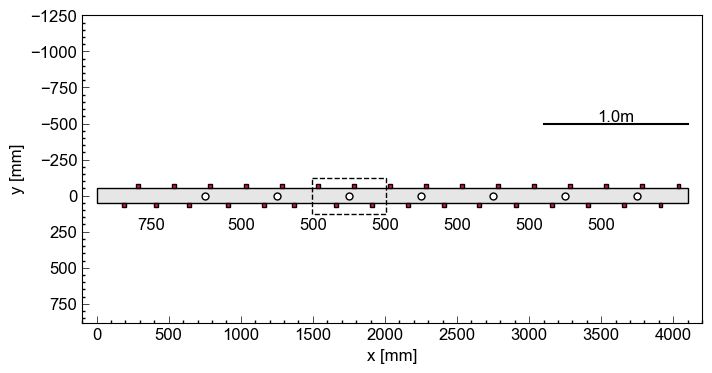

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

left = 0 #[mm]
bottom = -50 #[mm]
width = 4100 #[mm]
height = 100 #[mm]

ax.axis('equal')

rect = Rectangle((left, bottom), width, height, fill=True, fc=Rock_color, edgecolor="k")

ax.add_patch(rect)


# plot location of stations

# We plot the scaled size of the sensor

sensor_scale_factor = 2 # for ease of visuallization 
R_sensor = 6.35 * sensor_scale_factor # [mm] radius of AE sensor
H_sensor = 15 * sensor_scale_factor # [mm] hight of AE sensor

for stnm in channel_loc:
    x1 = channel_loc[stnm][0]
    y1 = channel_loc[stnm][1]
    z1 = channel_loc[stnm][2]
    
    AEid = int(stnm[-2::])
    # if not AEid in [7, 8, 22, 23, 24]:
    #     continue
        
    # upper side
    if y1 >0:
        # ax.plot(x1, y1+10, marker='s', markersize=10, color='r', mec='r', zorder=-1)
        rect_sensor = Rectangle((x1-R_sensor, y1), R_sensor*2, H_sensor, fill=True, color=AEsensor_color, ec='k')
        ax.add_patch(rect_sensor)
        # if stnm == "OL01":
        #     ax.text(x1, y1+20, f"{stnm}", ha="center", va="top", clip_on=True)
        # else:
        #     ax.text(x1, y1+20, f"{stnm[-2::]}", ha="center", va="top", clip_on=True)

    elif y1 < 0:
        # ax.plot(x1, y1-10, marker='s', markersize=10, color='r', mec='r', zorder=-1)
        rect_sensor = Rectangle((x1-R_sensor, y1), R_sensor*2, -H_sensor, fill=True, color=AEsensor_color, ec='k')
        ax.add_patch(rect_sensor)
        # ax.text(x1, y1-25, f"{stnm[-2::]}", ha="center", va="bottom", clip_on=True)
        
    # plot sensor span
    if y1>0:
        if AEid<16:
            stnm_next = f"OL{AEid+1:02d}"
            x1_next = channel_loc[stnm_next][0]
            x1_mid = (x1 + x1_next)/2
            span = x1_next - x1
            # ax.text(x1_mid, y1+250, f"{span:.0f}", zorder=1, ha="center", va="bottom")
            # print(AEid)
        
    elif y1<0:
        if AEid<32:
            stnm_next = f"OL{AEid+1:02d}"
            x1_next = channel_loc[stnm_next][0]
            x1_mid = (x1 + x1_next)/2
            span = x1_next - x1
            # ax.text(x1_mid, y1-150, f"{span:.0f}", zorder=1, ha="center", va="bottom")
            # print(AEid)
  
  

# Plot location of gouge patch
# gougepatch_x = [750, 1250, 1750, 2250, 2750, 3250, 3750]
ax.plot(gougepatch_x, np.zeros(len(gougepatch_x)),"o", markeredgecolor='k', c=gougepatch_color, ms=5)

for i, x1 in enumerate(gougepatch_x):
    if i==0:
        x0 = 0
        xspan = x1
    else:
        x0=gougepatch_x[i-1]
        xspan = x1-x0

    xmid = (x0+x1)/2
    ax.text(xmid, 150, f"{xspan}", ha="center", va="top")

# plot rectangular for the zoom plot
# gougepatch_id =3 # G3
# gx = gougepatch_x[gougepatch_id-1] 
# xlim_len_left = 255
# xlim_len_right = 255
# xlimit_zoom = [gx-xlim_len_left, gx+xlim_len_right]
zoombox_H = 250 #[mm]
rect_zoom = Rectangle((gx-xlim_len_left, -zoombox_H/2), xlimit_zoom[1]-xlimit_zoom[0], zoombox_H, fill=False,edgecolor="k", ls="--")

ax.add_patch(rect_zoom)


# Plot scale
scale_len = 1000
ax.plot([3100, 3100+scale_len], [-500, -500], "k-")
ax.text(3100+scale_len/2, -600, f"{scale_len/1e3}m", ha="center", va="top")

# Decorate figure
ax.set_xlim([-100, 4200])
# ax.set_ylim([-1000, 1000]) # axis set as equal
# ax.set_yticks([0, -25, -50, -75, -100])
ax.set_xlabel(r"$x$ [mm]", fontsize=fontsize)
ax.set_ylabel(r"$y$ [mm]", fontsize=fontsize)

ax.set_xlim([-100, 4200])
# ax.grid(True)
# ax.set_xlim(left, width)
# ax.set_ylim(bottom, height/2)
# ax.set_yticks([-50, -25, 0, 25, 50])
# ax.set_aspect(aspect_ratio)
plt.gca().invert_yaxis()

ax.set_xlabel("x [mm]", fontsize=fontsize)
ax.set_ylabel("y [mm]", fontsize=fontsize)
plt.savefig(figdir+"/GP_and_SensorArray_AE.png", format="png", dpi=80)
plt.savefig(figdir+"/GP_and_SensorArray_AE.pdf", format="pdf")


In [12]:
gx-channel_loc['OL22'][0]-xlim_len_left, gx-channel_loc['OL08'][0]+xlim_len_right

(-40.0, 95.0)

## Plot zoom of the top view 

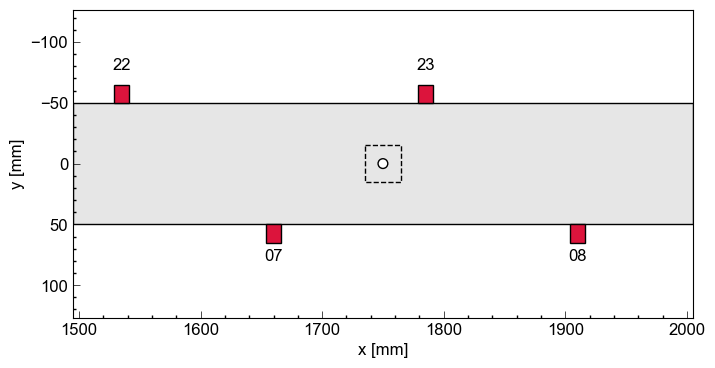

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

left = 0 #[mm]
bottom = -50 #[mm]
width = 4100 #[mm]
height = 100 #[mm]

ax.axis('equal')

# rect = Rectangle((left, bottom), width, height, fill=True, fc=Rock_color, edgecolor="k")
rect_zoom_fill = Rectangle((gx-xlim_len_left, bottom), xlimit_zoom[1]-xlimit_zoom[0], height,
                           fill=True, fc=Rock_color, edgecolor="k")


ax.add_patch(rect_zoom_fill)


# plot location of stations

# We plot the actual size of the sensor for the zoom plot
R_sensor = 6.35 # [mm] radius of AE sensor
H_sensor = 15 # [mm] hight of AE sensor

for stnm in channel_loc:
    x1 = channel_loc[stnm][0]
    y1 = channel_loc[stnm][1]
    z1 = channel_loc[stnm][2]
    
    AEid = int(stnm[-2::])
    if not AEid in [7, 8, 22, 23, 24]:
        continue
        
    # upper side
    if y1 >0:
        # ax.plot(x1, y1+10, marker='s', markersize=10, color='r', mec='r', zorder=-1)
        rect_sensor = Rectangle((x1-R_sensor, y1), R_sensor*2, H_sensor, fill=True, color=AEsensor_color, ec='k')
        ax.add_patch(rect_sensor)
        if stnm == "OL01":
            ax.text(x1, y1+20, f"{stnm}", ha="center", va="top", clip_on=True)
        else:
            ax.text(x1, y1+20, f"{stnm[-2::]}", ha="center", va="top", clip_on=True)

    elif y1 < 0:
        # ax.plot(x1, y1-10, marker='s', markersize=10, color='r', mec='r', zorder=-1)
        rect_sensor = Rectangle((x1-R_sensor, y1), R_sensor*2, -H_sensor, fill=True, color=AEsensor_color, ec='k')
        ax.add_patch(rect_sensor)
        ax.text(x1, y1-25, f"{stnm[-2::]}", ha="center", va="bottom", clip_on=True)
        
    # plot sensor span
    if y1>0:
        if AEid<16:
            stnm_next = f"OL{AEid+1:02d}"
            x1_next = channel_loc[stnm_next][0]
            x1_mid = (x1 + x1_next)/2
            span = x1_next - x1
            # ax.text(x1_mid, y1+250, f"{span:.0f}", zorder=1, ha="center", va="bottom")
            # print(AEid)
        
    elif y1<0:
        if AEid<32:
            stnm_next = f"OL{AEid+1:02d}"
            x1_next = channel_loc[stnm_next][0]
            x1_mid = (x1 + x1_next)/2
            span = x1_next - x1
            # ax.text(x1_mid, y1-150, f"{span:.0f}", zorder=1, ha="center", va="bottom")
            # print(AEid)
  

# Plot location of gouge patch
gougepatch_x = [750, 1250, 1750, 2250, 2750, 3250, 3750]

# We plot the actual size of the gouge patch for the zoom plot.
R_patch=4.0 # [mm]
gougepatch_id = 3 # G3

gp = Circle((gougepatch_x[gougepatch_id-1], 0), R_patch, fill=True, color=gougepatch_color, ec='k')
ax.add_patch(gp)


# ax.plot(gougepatch_x, np.zeros(len(gougepatch_x)),"o", markeredgecolor='k', c='gray', ms=4)


for i, x1 in enumerate(gougepatch_x):
    if i==0:
        x0 = 0
        xspan = x1
    else:
        x0=gougepatch_x[i-1]
        xspan = x1-x0

    xmid = (x0+x1)/2
    # ax.text(xmid, 130, f"{xspan}", ha="center", va="top", clip_on=True)

# Plot scale
# scale_len = 1000
# ax.plot([3100, 3100+scale_len], [-500, -500], "k-")
# ax.text(3100+scale_len/2, -600, f"{scale_len/1e3}m", ha="center", va="top")

# plot rectangular for the extra zoom plot
gougepatch_id =3 # G3
gx = gougepatch_x[gougepatch_id-1] 
xlim_len_ex = 15
xlimit_zoom_ex = [gx-xlim_len_ex, gx+xlim_len_ex]
zoombox_H = 30 #[mm]
rect_zoom_ex = Rectangle((gx-xlim_len_ex, -zoombox_H/2), xlim_len_ex*2, zoombox_H, fill=False,edgecolor="k", ls="--")

ax.add_patch(rect_zoom_ex)



# Decorate figure
ax.set_xlim([-100, 4200])
# ax.set_ylim([-1000, 1000]) # axis set as equal
# ax.set_yticks([0, -25, -50, -75, -100])
ax.set_xlabel(r"$x$ [mm]", fontsize=fontsize)
ax.set_ylabel(r"$y$ [mm]", fontsize=fontsize)

# zoom xlim
# gx = gougepatch_x[gougepatch_id-1] 
# xlim_len = 270

# xlimit = [gx-xlim_len, gx+xlim_len]
ax.set_xlim(xlimit_zoom)
# ax.set_xlim([1740, 1760])
# ax.grid(True)
# ax.set_xlim(left, width)
# ax.set_ylim(bottom, height/2)
# ax.set_yticks([-50, -25, 0, 25, 50])
# ax.set_aspect(aspect_ratio)
plt.gca().invert_yaxis()

ax.set_xlabel("x [mm]", fontsize=fontsize)
ax.set_ylabel("y [mm]", fontsize=fontsize)
plt.savefig(figdir+"/GP_and_SensorArray_AE_zoom.png", format="png", dpi=80)
plt.savefig(figdir+"/GP_and_SensorArray_AE_zoom.pdf", format="pdf")


In [14]:
(x1-R_sensor, H_sensor/2), R_sensor*2, H_sensor

((3743.65, 7.5), 12.7, 15)

## Plot extra zoom

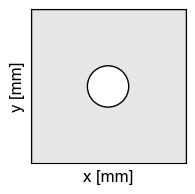

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

left = 0 #[mm]
bottom = -50 #[mm]
width = 4100 #[mm]
height = 100 #[mm]

ax.axis('equal')

# rect = Rectangle((left, bottom), width, height, fill=True, fc=Rock_color, edgecolor="k")
rect_zoom_ex_fill = Rectangle((gx-xlim_len_ex, -zoombox_H/2), xlim_len_ex*2, zoombox_H, fc=Rock_color, edgecolor="k")

ax.add_patch(rect_zoom_ex_fill)


# plot location of stations

# We plot the actual size of the sensor for the zoom plot
R_sensor = 6.35 # [mm] radius of AE sensor
H_sensor = 15 # [mm] hight of AE sensor

for stnm in channel_loc:
    x1 = channel_loc[stnm][0]
    y1 = channel_loc[stnm][1]
    z1 = channel_loc[stnm][2]
    
    AEid = int(stnm[-2::])
    if not AEid in [7, 8, 22, 23, 24]:
        continue
        
    # upper side
    if y1 >0:
        # ax.plot(x1, y1+10, marker='s', markersize=10, color='r', mec='r', zorder=-1)
        rect_sensor = Rectangle((x1-R_sensor, y1), R_sensor*2, H_sensor, fill=True, color=AEsensor_color, ec='k')
        ax.add_patch(rect_sensor)
        if stnm == "OL01":
            ax.text(x1, y1+20, f"{stnm}", ha="center", va="top", clip_on=True)
        else:
            ax.text(x1, y1+20, f"{stnm[-2::]}", ha="center", va="top", clip_on=True)

    elif y1 < 0:
        # ax.plot(x1, y1-10, marker='s', markersize=10, color='r', mec='r', zorder=-1)
        rect_sensor = Rectangle((x1-R_sensor, y1), R_sensor*2, -H_sensor, fill=True, color=AEsensor_color, ec='k')
        ax.add_patch(rect_sensor)
        ax.text(x1, y1-25, f"{stnm[-2::]}", ha="center", va="bottom", clip_on=True)
        
    # plot sensor span
    if y1>0:
        if AEid<16:
            stnm_next = f"OL{AEid+1:02d}"
            x1_next = channel_loc[stnm_next][0]
            x1_mid = (x1 + x1_next)/2
            span = x1_next - x1
            # ax.text(x1_mid, y1+250, f"{span:.0f}", zorder=1, ha="center", va="bottom")
            # print(AEid)
        
    elif y1<0:
        if AEid<32:
            stnm_next = f"OL{AEid+1:02d}"
            x1_next = channel_loc[stnm_next][0]
            x1_mid = (x1 + x1_next)/2
            span = x1_next - x1
            # ax.text(x1_mid, y1-150, f"{span:.0f}", zorder=1, ha="center", va="bottom")
            # print(AEid)
  

# Plot location of gouge patch
gougepatch_x = [750, 1250, 1750, 2250, 2750, 3250, 3750]

# We plot the actual size of the gouge patch for the zoom plot.
R_patch=4.0 # [mm]
gougepatch_id = 3 # G3

gp = Circle((gougepatch_x[gougepatch_id-1], 0), R_patch, fill=True, color=gougepatch_color, ec='k')
ax.add_patch(gp)


# ax.plot(gougepatch_x, np.zeros(len(gougepatch_x)),"o", markeredgecolor='k', c='gray', ms=4)


for i, x1 in enumerate(gougepatch_x):
    if i==0:
        x0 = 0
        xspan = x1
    else:
        x0=gougepatch_x[i-1]
        xspan = x1-x0

    xmid = (x0+x1)/2
    # ax.text(xmid, 130, f"{xspan}", ha="center", va="top", clip_on=True)

# Plot scale
# scale_len = 1000
# ax.plot([3100, 3100+scale_len], [-500, -500], "k-")
# ax.text(3100+scale_len/2, -600, f"{scale_len/1e3}m", ha="center", va="top")


# Decorate figure
ax.set_xlim([-100, 4200])
# ax.set_ylim([-1000, 1000]) # axis set as equal
# ax.set_yticks([0, -25, -50, -75, -100])
ax.set_xlabel(r"$x$ [mm]", fontsize=fontsize)
ax.set_ylabel(r"$y$ [mm]", fontsize=fontsize)

# zoom xlim
# gx = gougepatch_x[gougepatch_id-1] 
# xlim_len = 270

# xlimit = [gx-xlim_len, gx+xlim_len]
ax.set_xlim(xlimit_zoom_ex)
# ax.set_xlim([1740, 1760])
# ax.grid(True)
# ax.set_xlim(left, width)
# ax.set_ylim(bottom, height/2)
# ax.set_yticks([-50, -25, 0, 25, 50])
# ax.set_aspect(aspect_ratio)
plt.gca().invert_yaxis()
ax.set_xticks([])
ax.set_yticks([])

ax.set_xlabel("x [mm]", fontsize=fontsize)
ax.set_ylabel("y [mm]", fontsize=fontsize)
plt.savefig(figdir+"/GP_and_SensorArray_AE_zoom_ex.png", format="png", dpi=80)
plt.savefig(figdir+"/GP_and_SensorArray_AE_zoom_ex.pdf", format="pdf")


In [16]:
xlimit_zoom_ex

[1735, 1765]

# Plot master figure for Fig. 1c

Plot the master figure for the gouge patch geometry


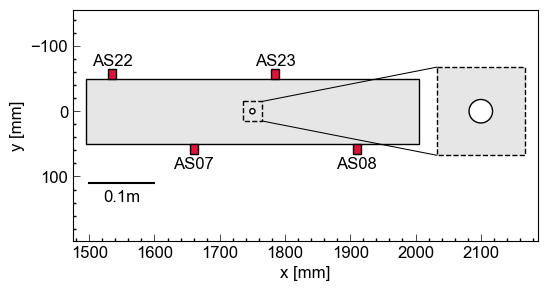

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

left = 0 #[mm]
bottom = -50 #[mm]
width = 4100 #[mm]
height = 100 #[mm]

ax.axis('equal')

# rect = Rectangle((left, bottom), width, height, fill=True, fc=Rock_color, edgecolor="k")
rect_zoom_fill = Rectangle((gx-xlim_len_left, bottom), xlimit_zoom[1]-xlimit_zoom[0], height,
                           fill=True, fc=Rock_color, edgecolor="k")


ax.add_patch(rect_zoom_fill)


# plot location of stations

# We plot the actual size of the sensor for the zoom plot
R_sensor = 6.35 # [mm] radius of AE sensor
H_sensor = 15 # [mm] hight of AE sensor

for stnm in channel_loc:
    x1 = channel_loc[stnm][0]
    y1 = channel_loc[stnm][1]
    z1 = channel_loc[stnm][2]
    
    AEid = int(stnm[-2::])
    if not AEid in [7, 8, 22, 23]:
        continue
        
    # upper side
    if y1 >0:
        # ax.plot(x1, y1+10, marker='s', markersize=10, color='r', mec='r', zorder=-1)
        rect_sensor = Rectangle((x1-R_sensor, y1), R_sensor*2, H_sensor, fill=True, color=AEsensor_color, ec='k')
        ax.add_patch(rect_sensor)
        if stnm == "OL01":
            ax.text(x1, y1+20, f"AS{stnm}", ha="center", va="top", clip_on=True)
        else:
            ax.text(x1, y1+20, f"AS{stnm[-2::]}", ha="center", va="top", clip_on=True)

    elif y1 < 0:
        # ax.plot(x1, y1-10, marker='s', markersize=10, color='r', mec='r', zorder=-1)
        rect_sensor = Rectangle((x1-R_sensor, y1), R_sensor*2, -H_sensor, fill=True, color=AEsensor_color, ec='k')
        ax.add_patch(rect_sensor)
        ax.text(x1, y1-15, f"AS{stnm[-2::]}", ha="center", va="bottom", clip_on=True)
        
    # plot sensor span
    if y1>0:
        if AEid<16:
            stnm_next = f"OL{AEid+1:02d}"
            x1_next = channel_loc[stnm_next][0]
            x1_mid = (x1 + x1_next)/2
            span = x1_next - x1
            # ax.text(x1_mid, y1+250, f"{span:.0f}", zorder=1, ha="center", va="bottom")
            # print(AEid)
        
    elif y1<0:
        if AEid<32:
            stnm_next = f"OL{AEid+1:02d}"
            x1_next = channel_loc[stnm_next][0]
            x1_mid = (x1 + x1_next)/2
            span = x1_next - x1
            # ax.text(x1_mid, y1-150, f"{span:.0f}", zorder=1, ha="center", va="bottom")
            # print(AEid)
  

# Plot location of gouge patch
gougepatch_x = [750, 1250, 1750, 2250, 2750, 3250, 3750]

# We plot the actual size of the gouge patch for the zoom plot.
R_patch=4.0 # [mm]
gougepatch_id = 3 # G3

gp = Circle((gougepatch_x[gougepatch_id-1], 0), R_patch, fill=True, color=gougepatch_color, ec='k')
ax.add_patch(gp)


# ax.plot(gougepatch_x, np.zeros(len(gougepatch_x)),"o", markeredgecolor='k', c='gray', ms=4)


for i, x1 in enumerate(gougepatch_x):
    if i==0:
        x0 = 0
        xspan = x1
    else:
        x0=gougepatch_x[i-1]
        xspan = x1-x0

    xmid = (x0+x1)/2
    # ax.text(xmid, 130, f"{xspan}", ha="center", va="top", clip_on=True)

# Plot scale
scale_len = 100
ax.plot([1500, 1500+scale_len], [110, 110], "k-")
ax.text(1500+scale_len/2, 120, f"{scale_len/1e3}m", ha="center", va="top")

# plot rectangular for the extra zoom plot
gougepatch_id =3 # G3
gx = gougepatch_x[gougepatch_id-1] 
xlim_len_ex = 15
xlimit_zoom_ex = [gx-xlim_len_ex, gx+xlim_len_ex]
zoombox_H = 30 #[mm]
rect_zoom_ex = Rectangle((gx-xlim_len_ex, -zoombox_H/2), xlim_len_ex*2, zoombox_H, fill=False,edgecolor="k", ls="--")

ax.add_patch(rect_zoom_ex)

#---------------------#
#---Plot extra zoom---#
#---------------------#
zoom_ex_ampfactor = 4.5 #50/15
zoom_ex_xshift = 350
# rect = Rectangle((left, bottom), width, height, fill=True, fc=Rock_color, edgecolor="k")
rect_zoom_ex_fill = Rectangle((gx-(xlim_len_ex*zoom_ex_ampfactor)+zoom_ex_xshift, -(zoombox_H*zoom_ex_ampfactor)/2), xlim_len_ex*2*zoom_ex_ampfactor, zoombox_H*zoom_ex_ampfactor,
                              fc=Rock_color, edgecolor="k", ls="--")

ax.add_patch(rect_zoom_ex_fill)

# We plot the actual size of the gouge patch for the zoom plot.
R_patch=4.0 # [mm]
gougepatch_id = 3 # G3

gp = Circle((zoom_ex_xshift+gougepatch_x[gougepatch_id-1], 0), R_patch*zoom_ex_ampfactor, fill=True, color=gougepatch_color, ec='k')
ax.add_patch(gp)

# plot zoom line
box_xy = [gx+xlim_len_ex, zoombox_H/2]
zoom_ex_xy = [gx-(xlim_len_ex*zoom_ex_ampfactor)+zoom_ex_xshift, (zoombox_H*zoom_ex_ampfactor)/2]
ax.plot([box_xy[0], zoom_ex_xy[0]], [box_xy[1], zoom_ex_xy[1]], "k-", lw=0.75)
ax.plot([box_xy[0], zoom_ex_xy[0]], [-box_xy[1], -zoom_ex_xy[1]], "k-", lw=0.75)

# Decorate figure
ax.set_xlim([-100, 4200])
# ax.set_ylim([-1000, 1000]) # axis set as equal
# ax.set_yticks([0, -25, -50, -75, -100])
ax.set_xlabel(r"$x$ [mm]", fontsize=fontsize)
ax.set_ylabel(r"$y$ [mm]", fontsize=fontsize)

# zoom xlim
# gx = gougepatch_x[gougepatch_id-1] 
# xlim_len = 270

# xlimit = [gx-xlim_len, gx+xlim_len]
plotmargin_x = 20
ax.set_xlim([xlimit_zoom[0]-plotmargin_x, gougepatch_x[gougepatch_id-1]+zoom_ex_xshift+xlim_len_ex*zoom_ex_ampfactor+plotmargin_x])
# ax.set_xlim([1740, 1760])
# ax.grid(True)
# ax.set_xlim(left, width)
# ax.set_ylim(bottom, height/2)
# ax.set_yticks([-50, -25, 0, 25, 50])
# ax.set_aspect(aspect_ratio)
plt.gca().invert_yaxis()
# ax.set_xticks([])
# ax.set_yticks([])

ax.set_xlabel("x [mm]", fontsize=fontsize)
ax.set_ylabel("y [mm]", fontsize=fontsize)


plt.savefig(figdir+"/Fig1c_master.png", format="png", dpi=80)
plt.savefig(figdir+"/Fig1c_master.eps", format="eps")
